# How to find an Exoplanet with TESS data

When a planet passes in front of its host star, from a certain view point, it causes the light of that star to dim. This is known as a transit. 

<img src="https://heasarc.gsfc.nasa.gov/docs/tess/images/mission/transit_white.png" style="width: 50%"/>

Many space missions have been specifically designed to detect planets using the transit method. One such mission is the [*Transiting Exoplanet Survey Satellite (TESS)*](https://heasarc.gsfc.nasa.gov/docs/tess/). 

*TESS* is a NASA-sponsored Astrophysics Explorer-class mission that is performing a near all-sky survey to search for planets transiting nearby stars. The mission observes from a unique elliptical high Earth orbit (HEO) that provides an unobstructed view of its field to obtain continuous light curves and a more stable platform for precise photometry than a low Earth orbit.

<img src="https://heasarc.gsfc.nasa.gov/docs/tess/images/mission/tess_lava_planet_rotated.jpg" style="width: 50%"/>


*TESS* is equipped with four CCD cameras that have adjacent field-of-views to produce a 4 x 1 array, or 'observing Sector', yielding a combined field-of-view of 96 x 24 degrees, as illustrated below. 

<img src="https://heasarc.gsfc.nasa.gov/docs/tess/images/mission/tess_observingsectorschematic_Winnpresentation.jpg" style="width: 50%"/>

Each hemisphere is split into these observing Sectors, and each Sector is observed for ~27 days. Since 2018, TESS has observed approximately 80% of the sky, mapping both the northern and southern hemispheres, and detecting thousands of planet candidates. 

Data from the *TESS* mission are publicly available from the [**Mikulski Archive for Space Telescopes (MAST)**](https://archive.stsci.edu/missions-and-data/tess). The main data products collected by the *TESS* mission are described below: 

- [Full Frame Images (FFIs)](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#full-frame-images): The full sector images, with a cadence of 30-min (years 1 & 2) or 10-min (years 3 & 4).
- [Target Pixel Files (TPFs)](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#target-pixel-files-tpfs): Postage stamp cut outs from the FFIs, focused on a selected target of interest. Each stamp has a cadence of 2-min or 20-sec. 
- [Light Curve Files (LCFs)](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html#light-curve-files): The time series data produced for each 2-min or 20-sec TPF object.         

To learn more about the *TESS* mission and its data products, please visit the [*TESS* GI pages](https://heasarc.gsfc.nasa.gov/docs/tess/data-products.html).

## Learning Goals

In this tutorial, we will teach the user how to access, analyze, and manipulate data from the *TESS* mission (this can also be applied to *Kepler* & *K2*). We will be utilizing a [Python](https://www.python.org) package called [*Lightkurve*](https://docs.lightkurve.org/index.html) which offers a user-friendly way to analyze time series data on the brightness of planets, stars, and galaxies. The package is focused on supporting science with NASA’s *Kepler* and *TESS* space telescopes but can equally be used to analyze light curves obtained by your backyard telescope. 
                  
This tutorial assumes a basic knowledge of python and astronomy, and will walk the user through several of the concepts outlined below,

-  How to use *Lightkurve* to access the various data products and create time series.
-  How to account for instrumental and noise effects within your data.
-  How to recover a planet transit from your data.

## Imports

This tutorial requires the use of specific packages:
- [**Lightkurve**](https://docs.lightkurve.org/index.html) to work with *TESS* data (v2.0.1)
- [**Matplotlib**](https://matplotlib.org/) for plotting.
- [**Numpy**](https://numpy.org) for manipulating the data.

In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### First time users

If you are not experienced with *Python*, or cannot download *Lightkurve*, you can run this notebook as a [Colab notebook](https://colab.research.google.com/notebooks/intro.ipynb?utm_source=scs-index). Colaboratory allows users to write and execute *Python* in your browser with zero configuration required. 

All you need is a Google account and to copy and paste in the following command at the top of your colab notebook:

`!pip install lightkurve --quiet`

This downloads the *Lightkurve* package.

## 1. How to use *Lightkurve* to access the various data products and create a time series

You can search for the various data products for *TESS* using the following *Lightkurve* functions.

- To look for your object in a full frame image: [`search_tesscut()`](https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html?highlight=search_tesscut)

- To look for target pixel files:  [`search_targetpixelfile()`](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html?highlight=search_targetpixelfile) 

- To obtain light curve files for your object of interest: [`search_lightcurve()`](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve) 


In this tutorial, we will be examining a nearby, bright target [Pi Mensae](https://exoplanets.nasa.gov/exoplanet-catalog/7271/pi-mensae-c/) (TIC ID 261136679), around which *TESS* scientists  discovered a short period planet candidate on a 6.27 day orbit. See the ApJ paper by [Huang et al (2018)](https://iopscience.iop.org/article/10.3847/2041-8213/aaef91/pdf) for more details.     

### 1.1 Accessing the data products

Let's go through each one of the above functions and see what data is available.

In [2]:
search_ffi = lk.search_tesscut('Pi Mensae')
search_tpf = lk.search_targetpixelfile('Pi Mensae')
search_lcf = lk.search_lightcurve('Pi Mensae')

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,TESScut,1426,Pi Mensae,0.0
1,TESS Sector 04,2018,TESScut,1426,Pi Mensae,0.0
2,TESS Sector 08,2019,TESScut,1426,Pi Mensae,0.0
3,TESS Sector 11,2019,TESScut,1426,Pi Mensae,0.0
4,TESS Sector 12,2019,TESScut,1426,Pi Mensae,0.0
5,TESS Sector 13,2019,TESScut,1426,Pi Mensae,0.0
6,TESS Sector 27,2020,TESScut,475,Pi Mensae,0.0
7,TESS Sector 28,2020,TESScut,475,Pi Mensae,0.0
8,TESS Sector 31,2020,TESScut,475,Pi Mensae,0.0


The above table provides several important pieces of information. 
- The sector in which the object was observed.
- The year in which the object was observed.
- The author of the data. This has multiple options, and each is a hyperlink that when clicked will provide you with more information. 
- The cadence of the observation. 
- The name of the target.
- The distance of the observation from your target of interest. This is useful if you conduct a cone search around your objects co-ordinates. 

The table above indicates that our object was observed in multiple Sectors. Note that in Sectors 1 - 13 (2018 & 2019) that the cadence of the FFI data was 30-min, but in Sectors 27 and above (2020 & 2021) it is 10-min.

Let's see if any other data exists - i.e., was it observed as a target of interest and does it have a Target Pixel File. 

In [4]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,261136679,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,261136679,0.0
2,TESS Sector 04,2018,SPOC,120,261136679,0.0
3,TESS Sector 04,2018,TESS-SPOC,1800,261136679,0.0
4,TESS Sector 08,2019,SPOC,120,261136679,0.0
5,TESS Sector 08,2019,TESS-SPOC,1800,261136679,0.0
6,TESS Sector 11,2019,SPOC,120,261136679,0.0
7,TESS Sector 11,2019,TESS-SPOC,1800,261136679,0.0
8,TESS Sector 12,2019,SPOC,120,261136679,0.0


Great! Our object was observed as a target of interest and has 2-min and 20-sec cadenced data. This means that there should be light curve files already on the archive. Let's check those out. 

In [5]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,261136679,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,261136679,0.0
2,TESS Sector 01,2018,QLP,1800,261136679,0.0
3,TESS Sector 01,2018,TASOC,120,261136679,0.0
4,TESS Sector 01,2018,TASOC,1800,261136679,0.0
5,TESS Sector 04,2018,SPOC,120,261136679,0.0
6,TESS Sector 04,2018,TESS-SPOC,1800,261136679,0.0
7,TESS Sector 04,2018,QLP,1800,261136679,0.0
8,TESS Sector 08,2019,SPOC,120,261136679,0.0


Wonderful! Light curves for our object of interest have already been created. 

### 1.2 Creating a light curve using a Light Curve File

Now on to getting the light curve for our object of interest. From the above table, it looks like there are multiple authors for our target. For this tutorial, let's stick to "SPOC" data products which have a 2-min cadence. We can return only these results using the following commands.

In [6]:
search_lcf_refined = lk.search_lightcurve('Pi Mensae', author="SPOC", exptime=120)
search_lcf_refined 

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,261136679,0.0
1,TESS Sector 04,2018,SPOC,120,261136679,0.0
2,TESS Sector 08,2019,SPOC,120,261136679,0.0
3,TESS Sector 11,2019,SPOC,120,261136679,0.0
4,TESS Sector 12,2019,SPOC,120,261136679,0.0
5,TESS Sector 13,2019,SPOC,120,261136679,0.0
6,TESS Sector 27,2020,SPOC,120,261136679,0.0
7,TESS Sector 28,2020,SPOC,120,261136679,0.0
8,TESS Sector 31,2020,SPOC,120,261136679,0.0


We now see 11 search results. Let's download these and see what the light curve looks like.

In [7]:
lcf = search_lcf_refined.download_all()

In [8]:
lcf

LightCurveCollection of 12 objects:
    0: <TessLightCurve LABEL="TIC 261136679" SECTOR=1 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 261136679" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 261136679" SECTOR=8 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 261136679" SECTOR=11 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 261136679" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    5: <TessLightCurve LABEL="TIC 261136679" SECTOR=13 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    6: <TessLightCurve LABEL="TIC 261136679" SECTOR=27 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    7: <TessLightCurve LABEL="TIC 261136679" SECTOR=28 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    8: <TessLightCurve LABEL="TIC 261136679" SECTOR=31 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    9: <TessLightCurve LABEL="TIC 261136679" SECTOR=34 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    10: <TessLightCurve LABEL="TIC 261136679" S

The above indicates that we have downloaded the light curves for each Sector and stored the data in arrays. You can look at the data for a specific Sector by specifying an array number as indicated below. This displays the data for Sector 1 as a table.

In [9]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1325.2969604950604,1.4641956e+06,1.3036719e+02,1.2319778e-03,70445,1630.67624,260.67540,1.4354926e+06,1.2776145e+02,3.9114688e+03,1.5351995e+01,1.4641956e+06,1.3036719e+02,0,nan,nan,nan,nan,1630.67624,8.4099076e-05,260.67540,1.3968609e-04,9.0913408e-02,-7.2966635e-02
1325.2983493645327,1.4643365e+06,1.3035809e+02,1.2319590e-03,70446,1630.64880,260.63392,1.4357199e+06,1.2775254e+02,3.8596919e+03,1.5269516e+01,1.4643365e+06,1.3035809e+02,0,nan,nan,nan,nan,1630.64880,8.4054744e-05,260.63392,1.3961994e-04,6.2022530e-02,-1.0871942e-01
1325.299738234005,1.4643485e+06,1.3035931e+02,1.2319401e-03,70447,1630.64806,260.62840,1.4356588e+06,1.2775373e+02,3.8692920e+03,1.5291610e+01,1.4643485e+06,1.3035931e+02,0,nan,nan,nan,nan,1630.64806,8.4062471e-05,260.62840,1.3959571e-04,6.1673984e-02,-1.1394957e-01
1325.301127103477,1.4643674e+06,1.3035008e+02,1.2319213e-03,70448,1630.64752,260.61434,1.4356190e+06,1.2774468e+02,3.8398132e+03,1.5262703e+01,1.4643674e+06,1.3035008e+02,0,nan,nan,nan,nan,1630.64752,8.4045743e-05,260.61434,1.3958366e-04,6.0909923e-02,-1.2573890e-01
1325.3025159730657,1.4642560e+06,1.3034836e+02,1.2319025e-03,70449,1630.64057,260.61412,1.4355810e+06,1.2774299e+02,3.8384204e+03,1.5262712e+01,1.4642560e+06,1.3034836e+02,0,nan,nan,nan,nan,1630.64057,8.4043444e-05,260.61412,1.3952980e-04,5.3837594e-02,-1.2532526e-01
1325.303904842538,1.4644681e+06,1.3035623e+02,1.2318837e-03,70450,1630.63971,260.61326,1.4358005e+06,1.2775071e+02,3.8069717e+03,1.5240330e+01,1.4644681e+06,1.3035623e+02,0,nan,nan,nan,nan,1630.63971,8.4056861e-05,260.61326,1.3949080e-04,5.2977830e-02,-1.2562653e-01
1325.3052937121265,1.4643586e+06,1.3035381e+02,1.2318649e-03,70451,1630.64385,260.60708,1.4356219e+06,1.2774834e+02,3.8431169e+03,1.5283619e+01,1.4643586e+06,1.3035381e+02,0,nan,nan,nan,nan,1630.64385,8.4062158e-05,260.60708,1.3951714e-04,5.7222184e-02,-1.3051888e-01
1325.3066825815986,1.4643564e+06,1.3035527e+02,1.2318461e-03,70452,1630.64220,260.61215,1.4356771e+06,1.2774977e+02,3.8419392e+03,1.5270525e+01,1.4643564e+06,1.3035527e+02,0,nan,nan,nan,nan,1630.64220,8.4041087e-05,260.61215,1.3955019e-04,5.5443291e-02,-1.2712292e-01


In this table, you are given the time and the flux for your object of interest.
There does however seem to be three entries for flux: flux, sap_flux, and pdcsap_flux. 
By default, the flux = pdcsap_flux, but what do these entries mean?

- **Simple Aperture Photometry (SAP)**:  The SAP light curve is calculated by summing together the brightness of pixels that fall within an aperture set by the *TESS* mission. This is often referred to as the *optimal aperture*, but despite its name, it can sometimes be improved upon! Because the SAP light curve is a sum of the brightness in chosen pixels, it is still subject to systematic artifacts of the mission.

- **Pre-search Data Conditioning SAP flux (PDCSAP) flux**: SAP flux from which long-term trends have been removed using so-called Co-trending Basis Vectors (CBVs). PDCSAP flux is usually cleaner data than the SAP flux and will have fewer systematic trends.


You can switch between fluxes using the following commands,

    pdcsap = lcf[0].pdcsap_flux
    
    sapflux = lcf[0].sap_flux

Let's now plot both the PDCSAP and SAP light curves and see what they look like.

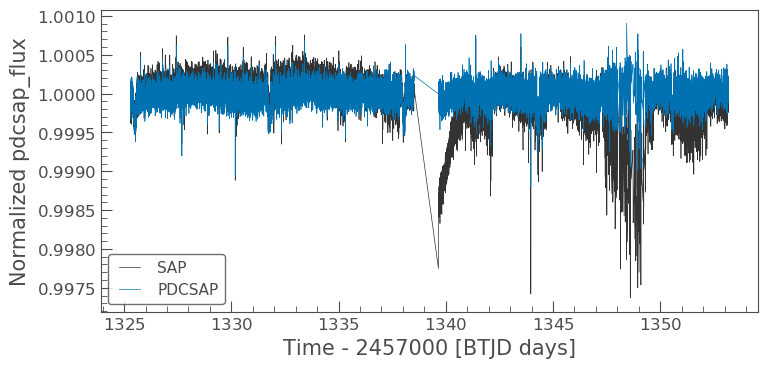

In [10]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

There are some big differences between these two light curves, specifically the dips in the SAP light curve and its overall gradent. These differences will be discussed later in the tutorial. For now, let's think about how we can manipulate the light curves.

#### 1.2.1 Manipulating a light curve

There are a set of useful functions in *Lightkurve* which you can use to work with the data. 
These include:

- [flatten()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.flatten.html?highlight=flatten#lightkurve.LightCurve.flatten): Remove long term trends using a Savitzky–Golay filter
- [remove_outliers()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_outliers.html?highlight=remove_outliers): Remove outliers using simple sigma clipping
- [remove_nans()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_nans.html?highlight=remove_nans): Remove infinite or NaN values (these can occur during thruster firings)
- [fold()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.fold.html?highlight=fold): Fold the data at a particular period
- [bin()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.bin.html?highlight=bin): Reduce the time resolution of the array, taking the average value in each bin.

We can use these simply on a light curve object. For this tutorial, let's stick with the PDCSAP flux.

Text(0.5, 1.0, 'PDCSAP light curve of  Pi Mensae')

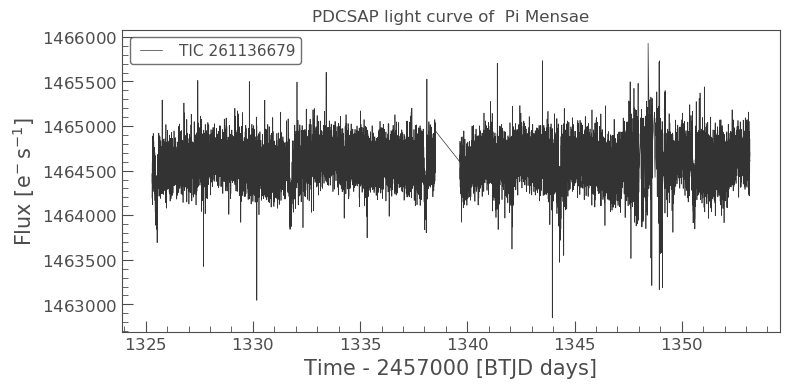

In [11]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of  Pi Mensae")

We can kind of make out a possible transit but let us manipulate the light curve some more to see if we can pull it out. 

### Flattening

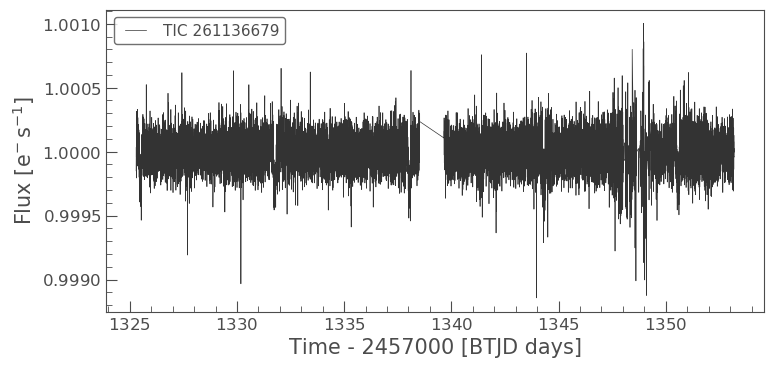

In [12]:
flat_lc = lcf[0].flatten(window_length=1001)
flat_lc.plot();

The light curve looks much flatter. Unfortunately, there is a portion of the light curve that is very noisy, due to a jitter in the TESS spacecraft. We can remove this simply by masking the light curve. First, we’ll select the times that had the jitter.

In [13]:
# Flag the times that are good quality
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)

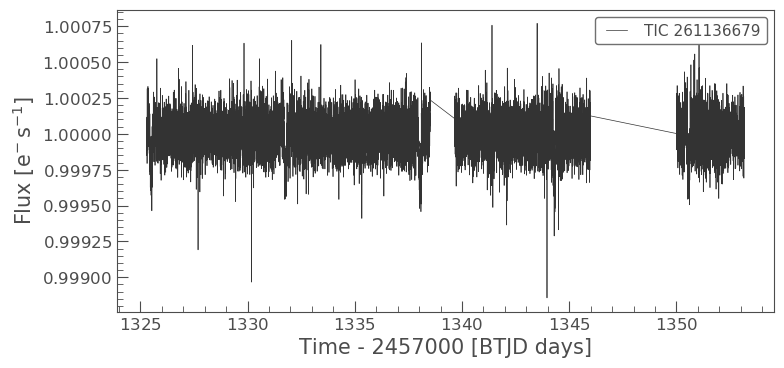

In [14]:
masked_lc = flat_lc[mask]
masked_lc.plot()

We can use Lightkurve to plot these two light curves over each other to see the difference.

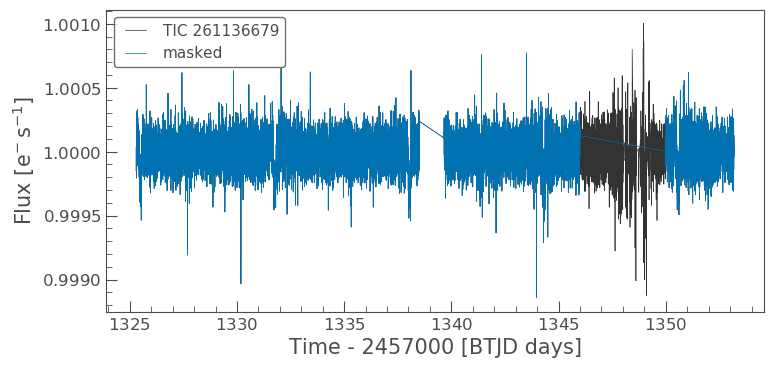

In [15]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.plot()

# Pass that axis to the next plot
masked_lc.plot(ax=ax, label='masked');

This looks much better. Now we might want to clip out some outliers from the light curve. We can do that with a simple *Lightkurve* function remove_outliers().

### Remove outliers

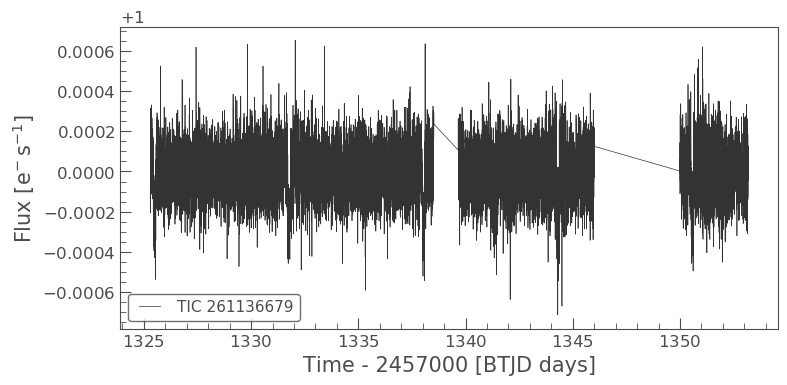

In [16]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.plot();

Finally, let’s use *Lightkurve* to fold the data at the exoplanet orbital period and see if we can detect the transit.

### Folding the light curve and finding the transit
From the Pi Mensae paper, we know that planet c has a period of 6.27 days. We can use the `fold()` function to find the transit in our data as shown below.

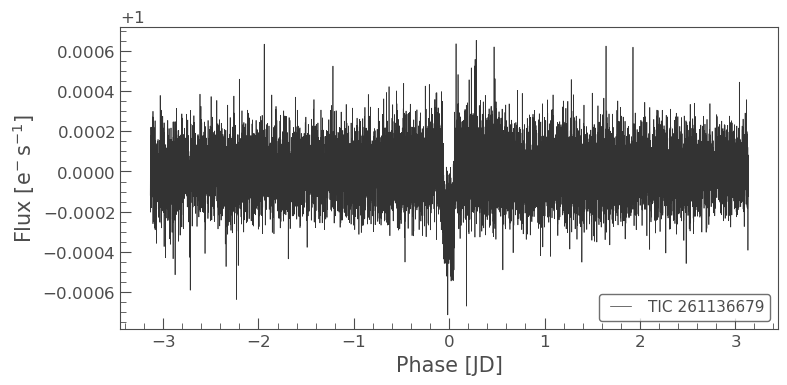

In [17]:
folded_lc = clipped_lc.fold(period=6.27, epoch_time=1325.504)
folded_lc.plot();

It looks like there’s something there, but it’s hard to see. Let’s bin the light curve to reduce the number of points, but also reduce the uncertainty of those points.

### Binning the light curve

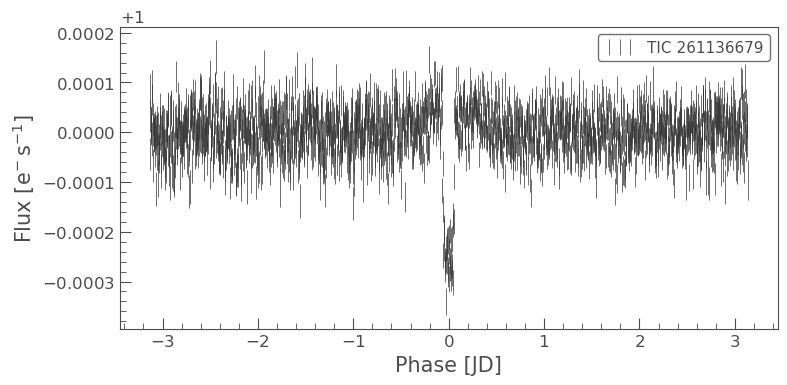

In [18]:
import astropy.units as u
binned_lc = folded_lc.bin(time_bin_size=5*u.minute)
binned_lc.errorbar();

And now we can see the transit of Pi Mensae c!

### 2. Creating a light curve using FFI data

In our previous FFI search, we found that *Pi Men* was observed in Sector 1 with a 30-min cadence. This data is stored as the 1st argument of the *search_ffi* array. 

To create the light curve from the FFI data, we must first download the relevant images. Note that we do not want the entirety of the Sector 1 FFI, only a small region surrounding our object of interest. We can specify the size of the region we want to cut out using the commands below, in this case we want a 10x10 pixel region.

In [19]:
ffi_data = search_ffi[0].download(cutout_size=10)

Let's now see what this cut out looks like and also check that our object is at the center of it.

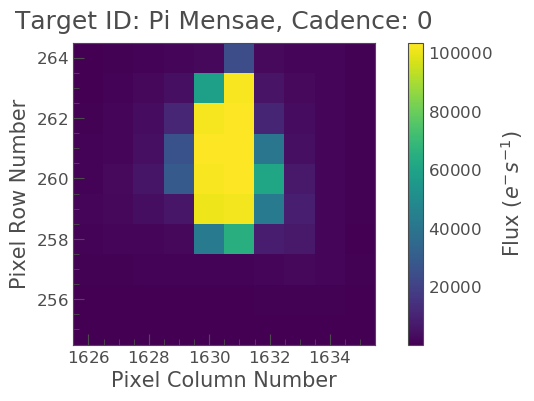

In [20]:
ffi_data.plot()

The above figure indicates the pixels on the CCD camera, with which *Pi Men* was observed. The color indicates the amount of flux in each pixel, in electrons per second. The y-axis shows the pixel row, and the x-axis shows the pixel column. The title tells us the *TESS* Input Catalogue ([TIC](https://tess.mit.edu/science/tess-input-catalogue/)) identification number of the target, and the observing cadence of this image. By default, `plot()` shows the first observation cadence in the Sector.

It looks like our star is isolated, so we can extract a light-curve by simply summing up all the pixel values in each image. To do this, we need to first define an **aperture mask**. 

Many decisions go into the choice of aperture mask, including the significant blending of the large *TESS* pixels. In this tutorial, we are going to define an aperture by defining a median flux value and only selecting pixels at a certain sigma above that threshold. 

In most situations, a threshold mask will be the best choice for custom aperture photometry, as it doesn’t involve trial and error beyond finding the best sigma value. You can define a threshold mask using the following code:

In [21]:
target_mask = ffi_data.create_threshold_mask(threshold=10, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

18

This indicates that there are 18 pixels which are above our threshold and so in our mask. We can now check to make sure that our target is covered by this mask using plot.

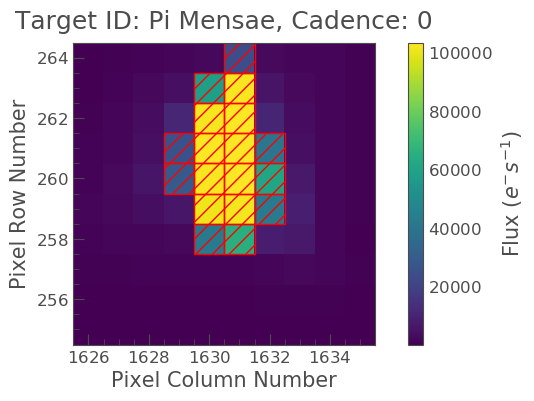

In [22]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r')

Nice! We see our target mask centered on the 18 brightest pixels in the center of the image. Let’s see what the light curve looks like. Note that this light curve will be uncorrected for any anomalies or noise, and that the flux is therefore based upon “Simple Aperture Photometry” (SAP).

To create our light curve, we will pass our **aperture_mask** to the [`to_lightcurve`](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.to_lightcurve.html?highlight=to_lightcurve) function.

In [23]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

Once again, we can examine the light curve data as a table, but note this time that there is only one flux value and that as default, this is the SAP flux.

In [24]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int64,int32
1325.324261183436,1316430.75,31.303890228271484,1630.6385441885782,260.61400004745315,0,0
1325.345094309689,1316496.0,31.304616928100586,1630.63890532941,260.614058268241,1,0
1325.3659274373958,1316588.125,31.30562400817871,1630.6395243879658,260.61363650321783,2,0
1325.386760566499,1316589.0,31.305648803710938,1630.6392641770467,260.61324889099075,3,0
1325.407593697,1316634.125,31.306297302246094,1630.6403961686917,260.61333124245886,4,0
1325.4284268288402,1316664.875,31.306610107421875,1630.6403907997208,260.61168543184255,5,0
1325.4492599619616,1316503.25,31.304628372192383,1630.6404545748724,260.6105785492981,6,0
1325.470093096421,1316347.125,31.30280113220215,1630.6417255479462,260.61074264747987,7,0


Let's now plot this,

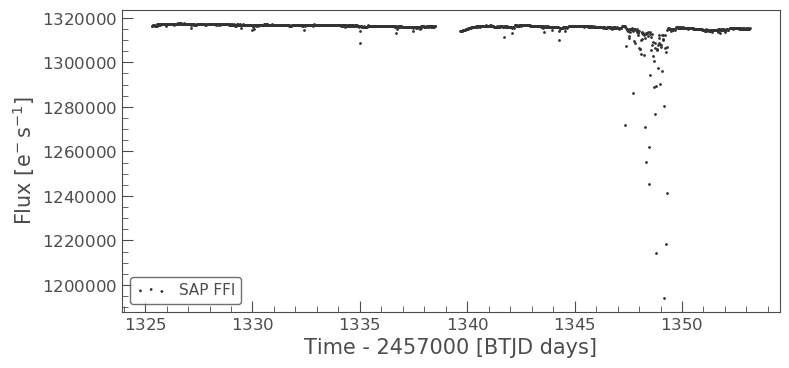

In [25]:
ffi_lc.scatter(label="SAP FFI")

We can see that there are problematic data points in this light curve which are probably due to  jitter. Once again, we can remove these data points via creating and applying a mask.

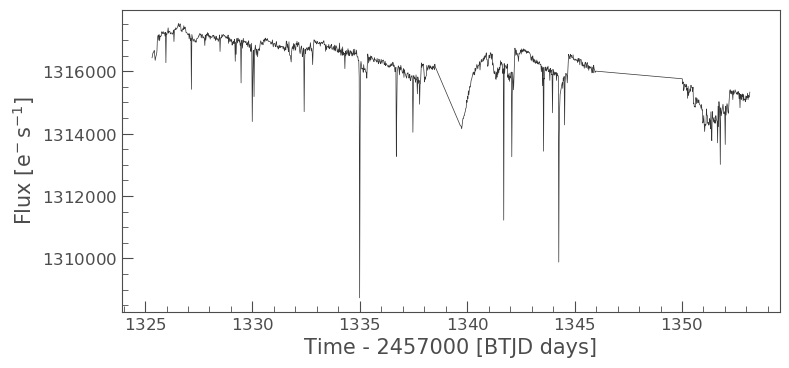

In [26]:
mask_ffi = (ffi_lc.time.value < 1346) | (ffi_lc.time.value > 1350)
masked_lc_ffi = ffi_lc[mask_ffi]
masked_lc_ffi.plot()

OK, this looks a bit better but we should also clip the data again. 

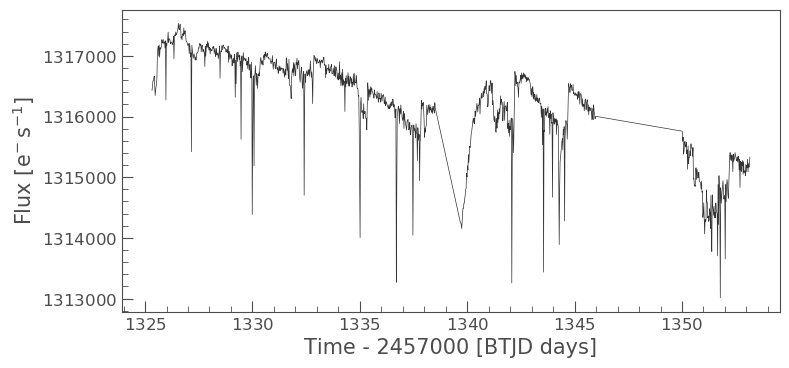

In [27]:
clipped_ffi = masked_lc_ffi.remove_outliers(sigma=6)
clipped_ffi.plot();

Looking at the above light curve, we can see that there are still a few odd trends that need to be addressed, but there is also strong evidence for the previously observed transit! We can try to clean up our data a little using *Lightkurve's* built in corrector class functions. These functions are very useful for removing scattered light and other effects. You can learn more about them [here](https://docs.lightkurve.org/tutorials/index.html#removing-instrumental-noise).

In this example, we are going to use the Pixel Level Decorrelation (PLD) Corrector (PLDCorrect). The PLD method has primarily been used to remove systematic trends introduced by small spacecraft motions during observations and has been shown to be successful at improving the precision of data taken by the Spitzer space telescope. PLD works by identifying a set of trends in the pixels surrounding the target star and performing linear regression to create a combination of these trends that effectively models the systematic noise introduced by spacecraft motion. This noise model is then subtracted from the uncorrected light curve. We can apply it to our data using the code shown below.

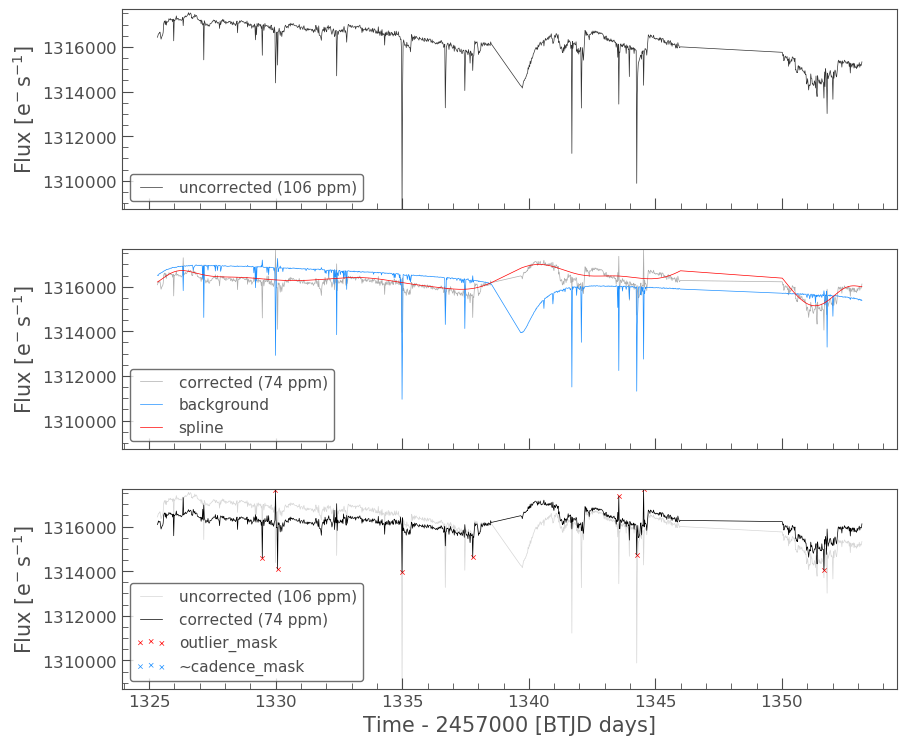

In [28]:
from lightkurve.correctors import PLDCorrector
pld = PLDCorrector(ffi_data[mask_ffi], aperture_mask=target_mask)
pld.correct(pca_components=3)
pltAxis = pld.diagnose()

corrected_ffi = pld.correct(pca_components=3)

The above plots indicate the corrections applied to our light curve. It removed a background and applied a spline; outliers are also presented. Let's now plot up our corrected light curve and compare to the corrected flux to the non-corrected flux.

(0.9975, 1.0025)

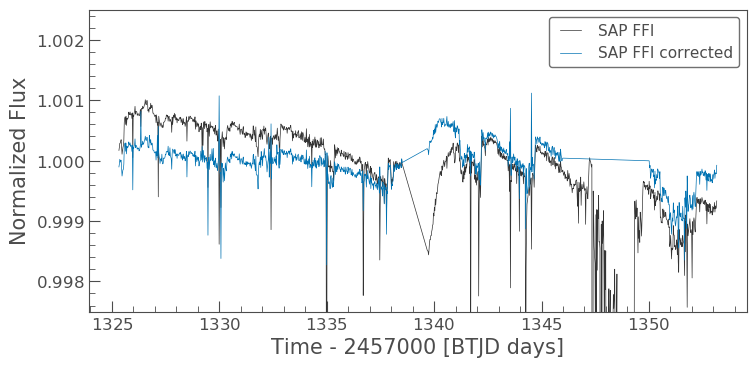

In [29]:
ax = ffi_lc.plot(normalize=True, label="SAP FFI");
corrected_ffi.remove_outliers().plot(ax=ax,normalize=True,label="SAP FFI corrected")
plt.ylim(0.9975,1.0025)

We can see that the corrector removed a lot of the trends that we were seeing. Let's now proceed as we did before and compare the results. First we need to `flatten()`.

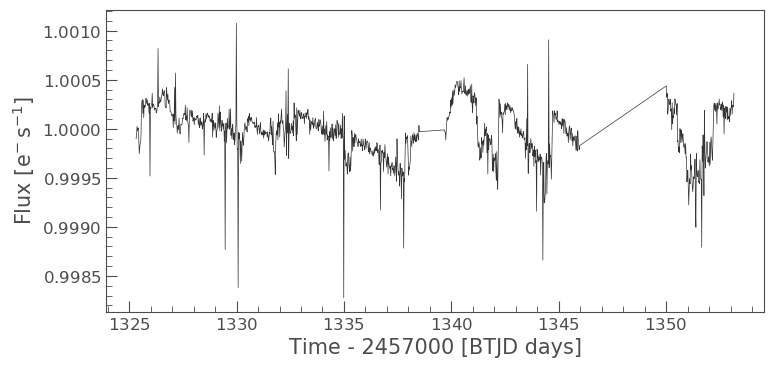

In [30]:
ffi_flat_lc = corrected_ffi.flatten(window_length=1001)
ffi_flat_lc.plot()

Now we need to `fold()`.

(0.999, 1.001)

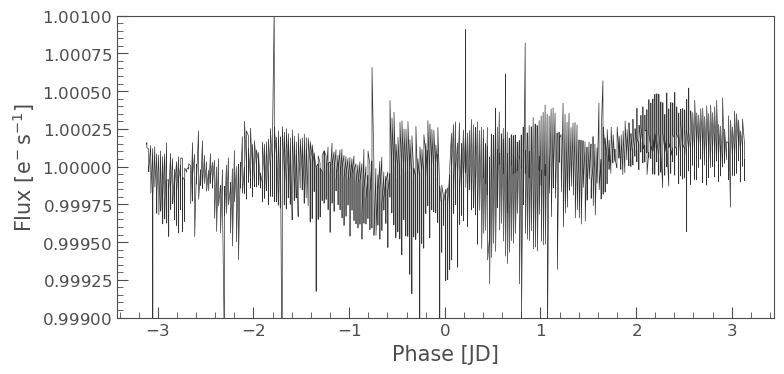

In [31]:
folded_ffi = ffi_flat_lc.fold(period=6.27, epoch_time=1325.504)
folded_ffi.plot()
plt.ylim(0.999,1.001)

It is a little noiser than before and a bit more difficult to see due to the longer cadence (30-min), but we can clearly make out the transit again. Let's compare this to our earlier light curve.

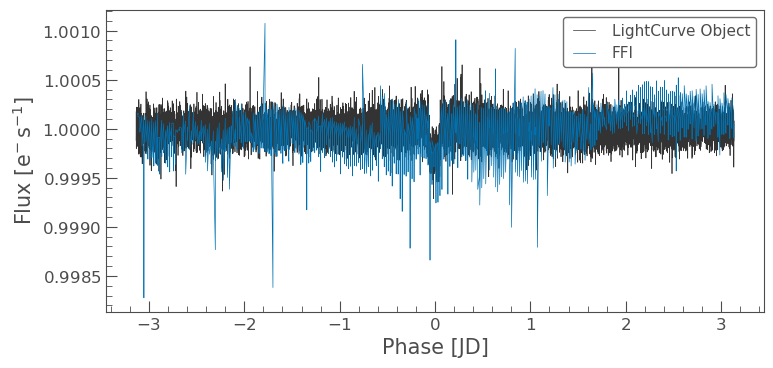

In [32]:
ax = folded_lc.plot(label="LightCurve Object")
folded_ffi.plot(ax=ax, label="FFI")

Great! The transit is shown in both cases. It is clear more work needs to be done on the FFI to remove noise and instrumental trends from the data, but this is a good start!

## Additional Resources 

In this tutorial, we have covered the basics of how to obtain, reduce and analyze *TESS* data using *Lightkurve*. We have, however, only skimmed the surface of what *Lightkurve* can do and how to investigate the data. For more detailed tutorials as well as other useful tools, please visit the following pages.

- [*Lightkurve Tutorials page*](https://docs.lightkurve.org/tutorials/index.html): A set of 21 tutorials dealing with Kepler/K2 and TESS data
- [TESS GI data products page](https://heasarc.gsfc.nasa.gov/docs/tess/data-analysis-tools.html): A set of 7 TESS specific tutorials.
- [STScI Kepler K3 notebooks](https://github.com/spacetelescope/notebooks/tree/master/notebooks/MAST/Kepler): A set of notebooks produced by a collaboration between NumFocus, MAST, *Lightkurve*, and TESS GI office. They make use of python astronomical data packages to demonstrate how to analyze time series data from these NASA missions. New tools are presented here and also techniques for the advanced user.


## Authors

[Rebekah Hounsell](https://heasarc.gsfc.nasa.gov/docs/tess/helpdesk.html) (with help from the Lightkurve Collaboration, 2018) - Support scientist for *TESS* in the NASA GSFC GI Office. For more help with TESS data, please contact us at tesshelp@bigbang.gsfc.nasa.gov.

<img src="https://heasarc.gsfc.nasa.gov/docs/tess/images/faces/rebekah.png" style="width: 20%"/>